# Pymaceuticals Inc.
---

### Analysis

-Based on statistic, Capomulin has almost the lowest mean,median, variance, standard deviation and standard error on tumor volumn. The only regimen shows better statistics is Ramicane.

-Totally 25 mice tested with Capomulin. By running a random Mouse ID, the line chart of tumor volume at timepoint shows that most mice have decreasing tumor volumn, indicating that the Capomulin has positive effect on eliminating the tumor on these mice. No outlier found in this sample, which means the data from this experiment is reliable with no extreme situation that may affect the result.

-The correlation 0.84 shows the the tumor volumn has very positive relationship with mice weight. The higher a mouse's weight is, the higher tumor volumn it has.
 

In [235]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(study_results, mouse_metadata, on='Mouse ID')
# Display the data table for preview
df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [236]:
# Checking the number of mice.
num_mice = df["Mouse ID"].nunique()
num_mice

249

In [237]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_data = df[df.duplicated(subset=['Mouse ID', 'Timepoint'])]
duplicated_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [238]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_df = df[df["Mouse ID"] == "g989"]
duplicated_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [303]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = df[df["Mouse ID"] != "g989"]
#cleaned_df
cleaned_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [240]:
# Checking the number of mice in the clean DataFrame.
netnum_mice = cleaned_df["Mouse ID"].nunique()
netnum_mice

248

## Summary Statistics

In [241]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_df = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_df = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var_df = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
stddev_df = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_df = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_df = pd.DataFrame ({'Mean Tumor Volume': (mean_df),
                            'Median Tumor Volume':(median_df),
                            'Tumor Volume Variance':(var_df),
                            'Tumor Volume Std. Dev.':(stddev_df),
                            'Tumor Volume Std. Err.': (sem_df)
                           })
summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [242]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary2_df = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median','var','std','sem'])
summary2_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

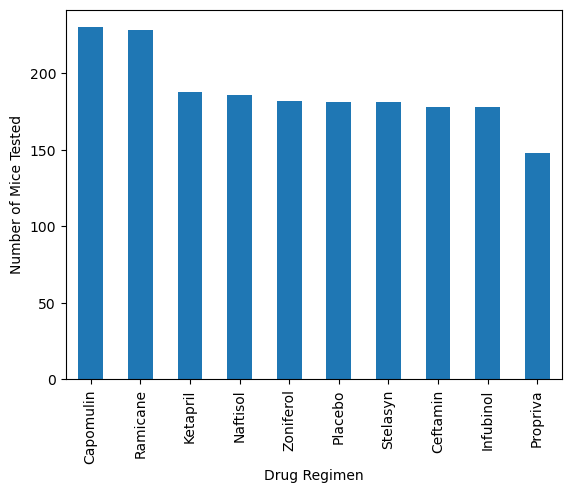

In [243]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_regimen = cleaned_df.groupby("Drug Regimen")
mice_tested = drug_regimen["Mouse ID"].count()
mice_tested_sorted = mice_tested.sort_values(ascending = False)

num_mice_tested_chart = mice_tested_sorted.plot (kind = "bar")

num_mice_tested_chart.set_xlabel("Drug Regimen")
num_mice_tested_chart.set_ylabel("Number of Mice Tested")
plt.show()

Text(0, 0.5, 'Number of Mice Tested')

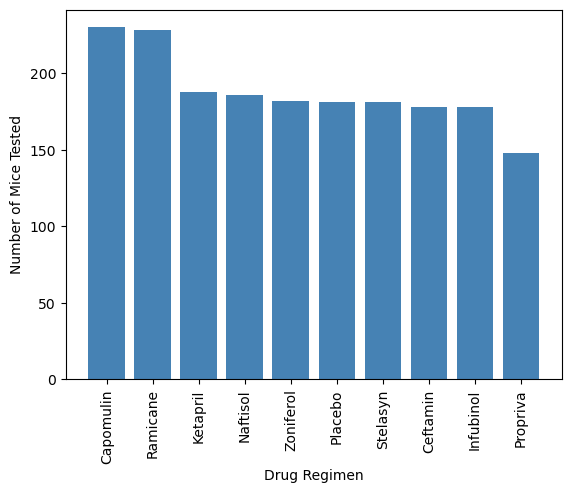

In [327]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

drugs = cleaned_df["Drug Regimen"].unique()
drugs_regimen = ['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
                 'Ramicane', 'Zoniferol', 'Propriva', 'Placebo', 'Ceftamin']
num_mice= cleaned_df.groupby("Drug Regimen")["Mouse ID"].count()

num_mice_sorted = num_mice.sort_values(ascending=False)
sorted_regimen = list(num_mice_sorted.index)

x_axis = np.arange(len(drugs_regimen))
plt.bar(x_axis, num_mice_sorted, color = "steelblue", align = "center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, sorted_regimen, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

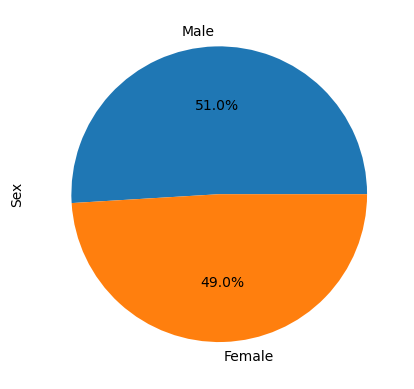

In [304]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = cleaned_df["Sex"].value_counts()

sex_pie = sex.plot (kind = "pie", labels=sex.index, autopct='%1.1f%%')

sex_pie.set_ylabel("Sex")

plt.show()

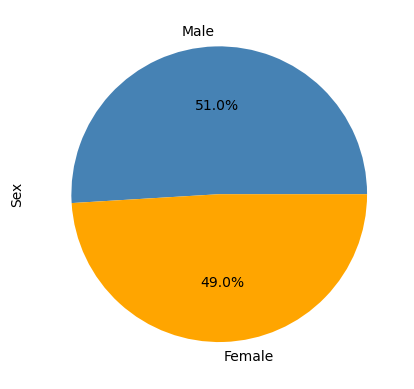

In [341]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = cleaned_df["Sex"].value_counts()
colors = ["steelblue", "orange"]
plt.pie(sex, labels=sex.index.values, colors=colors, autopct='%1.1f%%', startangle=0)
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [247]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
lasttimepoint_df = cleaned_df.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_volumn_df = pd.merge(lasttimepoint_df, cleaned_df, on=("Mouse ID","Timepoint"), how='left')
final_volumn_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [248]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumn = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drugs:
    drug_df = final_volumn_df[final_volumn_df['Drug Regimen'] == drug]
    volumns = drug_df['Tumor Volume (mm3)']
    
    quartiles = volumns.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
     
    
    # add subset 
    tumor_volumn.append(volumns)
    
    # Determine outliers using upper and lower bounds
    outlier_volumn = drug_df.loc[(volumns < lower_bound) | (volumns > upper_bound), 'Tumor Volume (mm3)']
    
    print(f"{drug}'s potential outliers: {outlier_volumn}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


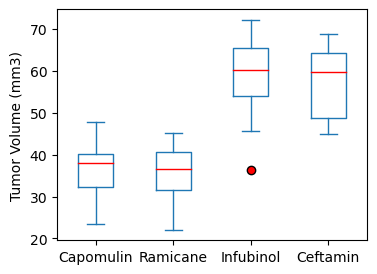

In [249]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_volumn_df = pd.DataFrame(tumor_volumn, index=drugs).T
fig, ax = plt.subplots(figsize=(4, 3))
tumor_volumn_df.plot(kind='box', ax=ax, flierprops=dict(markerfacecolor='red', marker='o'), medianprops=dict(color='red'))
ax.set_ylabel('Tumor Volume (mm3)')

plt.show()


## Line and Scatter Plots

25
b128


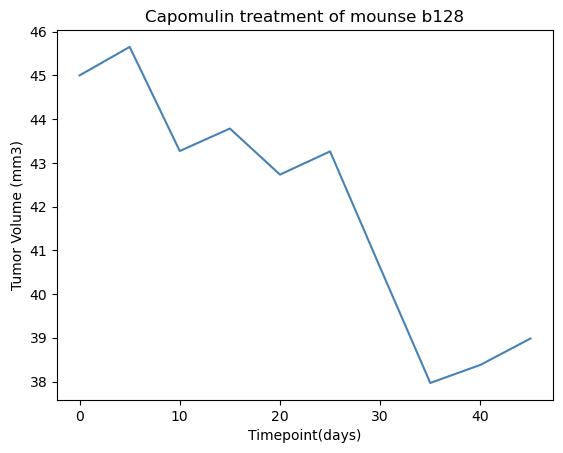

In [336]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
import random

capomulin_df = cleaned_df[cleaned_df["Drug Regimen"] == "Capomulin"]
print ((capomulin_df["Mouse ID"]).nunique())
random_id = random.choice(capomulin_df['Mouse ID'].tolist())
print(random_id)
random_df = capomulin_df[capomulin_df["Mouse ID"] == random_id]
random_df
random_df.plot(x='Timepoint', y='Tumor Volume (mm3)', kind='line', color='steelblue', legend = False)
plt.title(f"Capomulin treatment of mounse {random_id}")
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

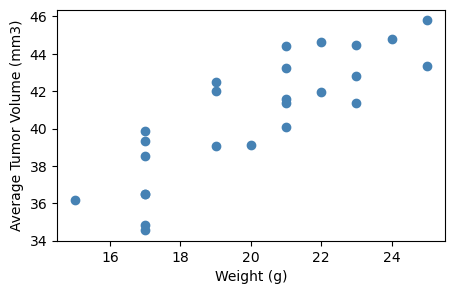

In [337]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_df = cleaned_df[cleaned_df["Drug Regimen"] == "Capomulin"]
capomulin_df
average_weight = capomulin_df.groupby("Mouse ID")["Weight (g)"].mean()
average_tumorvolumn = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

plt.figure(figsize=(5,3))
plt.scatter(average_weight, average_tumorvolumn, color='steelblue')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


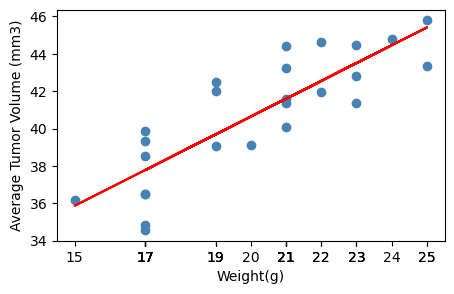

In [338]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

corr = average_weight.corr(average_tumorvolumn).round(2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}")

pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(average_weight, average_tumorvolumn)
pe_fit = pe_slope * average_weight + pe_int

plt.figure(figsize=(5,3))
plt.scatter(average_weight, average_tumorvolumn, color='steelblue')
plt.plot(average_weight,pe_fit, color = "red")
plt.xticks(average_weight)
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
